# 44 Fitting a plane through earthquake hypocenters

A plane can be put through a set of hypocenters of earthquakes to see if they would coincide with a single fault plane.

<img src="../images/tutorial44_cover.png">

## Set File Paths and download Tutorial Data

If you downloaded the latest `GemGIS` version from the Github repository, append the path so that the package can be imported successfully. Otherwise, it is recommended to install `GemGIS` via `pip install gemgis` and import `GemGIS` using `import gemgis as gg`. In addition, the file path to the folder where the data is being stored is set. The tutorial data is downloaded using Pooch (https://www.fatiando.org/pooch/latest/index.html) and stored in the specified folder. Use `pip install pooch` if Pooch is not installed on your system yet.

In [1]:
import gemgis as gg

file_path ='data/44_fitting_plane_through_earthquake_hypocenters/'

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
gg.download_gemgis_data.download_tutorial_data(filename="44_fitting_plane_through_earthquake_hypocenters.zip", dirpath=file_path)

## Loading Earthquake Data

The data from earthquakes in the beginning of January 2021 is used. 

In [2]:
import geopandas as gpd

gdf = gpd.read_file(filename= file_path+'earthquake_data.shp')
gdf['Z'] = gdf['Tiefe [km]']*(-1000)
gdf

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\test_gempy\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


,Datum,Uhrzeit (U,Breite [°,Länge [°,Tiefe [km],Magnitude,Epizentrum,geometry,Z
0,08.01.2021,02:56:50.400,50.69,6.23,10.00,1.60,S MULARTSHUETTE,POINT (32304265.590 5618571.115),-10000.00
1,06.01.2021,23:59:43.400,50.70,6.22,9.00,0.10,MULARTSHUETTE,POINT (32303759.041 5620148.713),-9000.00
2,06.01.2021,18:43:18.900,50.69,6.23,8.80,1.60,S MULARTSHUETTE,POINT (32304643.654 5619224.937),-8800.00
3,06.01.2021,12:03:38.100,50.70,6.22,9.20,0.10,MULARTSHUETTE,POINT (32303817.122 5619812.545),-9200.00
4,06.01.2021,11:18:11.500,50.69,6.22,9.10,0.80,MULARTSHUETTE,POINT (32303871.041 5619365.205),-9100.00
5,06.01.2021,04:14:19.000,50.69,6.24,11.30,1.10,S MULARTSHUETTE,POINT (32304851.354 5619105.849),-11300.00
6,05.01.2021,04:26:56.800,50.70,6.24,9.70,0.70,S MULARTSHUETTE,POINT (32304730.889 5619666.987),-9700.00
7,04.01.2021,05:57:23.900,50.69,6.23,10.00,0.50,S MULARTSHUETTE,POINT (32304348.701 5618901.987),-10000.00
8,03.01.2021,20:49:33.700,50.70,6.24,10.50,0.20,MULARTSHUETTE,POINT (32304730.889 5619666.987),-10500.00
9,03.01.2021,15:01:48.500,50.70,6.22,7.90,0.30,MULARTSHUETTE,POINT (32303547.227 5620156.674),-7900.00


## Create Meshes

In [3]:
spheres = gg.visualization.create_meshes_hypocenters(gdf=gdf)
spheres.save(file_path + 'spheres.vtm')
spheres

MultiBlock (0x22a4e08ce20)
  N Blocks:	29
  X Bounds:	32302838.000, 32305290.000
  Y Bounds:	5618056.000, 5620355.500
  Z Bounds:	-11540.000, -7840.000

In [4]:
type(spheres)

pyvista.core.composite.MultiBlock

## Plot Data

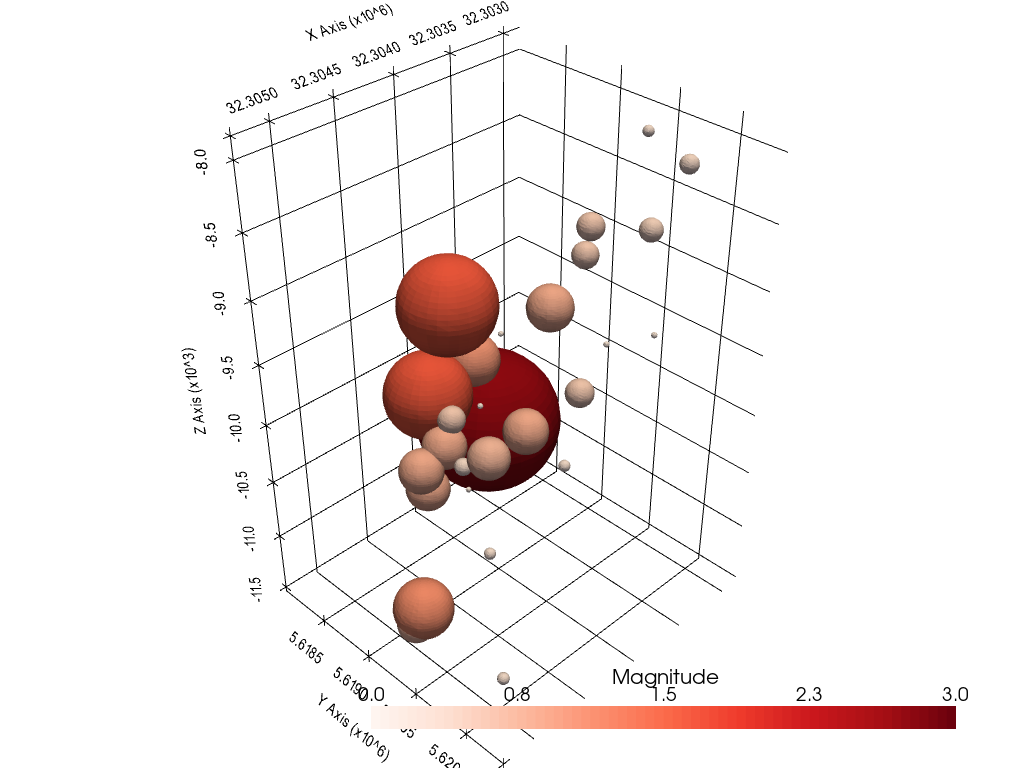

In [5]:
import pyvista as pv

sargs = dict(fmt="%.1f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(spheres,scalars='Magnitude', cmap='Reds', clim=[0,3], scalar_bar_args=sargs)

p.set_background('white')
p.show_grid(color='black')
p.show()

In [6]:
centers = [spheres.GetBlock(block).center for block in range(spheres.GetNumberOfBlocks())]
centers[:10]

[[32304266.0, 5618571.25, -10000.0],
 [32303760.0, 5620148.75, -9000.0],
 [32304644.0, 5619224.75, -8800.0],
 [32303818.0, 5619812.5, -9200.0],
 [32303871.0, 5619365.25, -9100.0],
 [32304852.0, 5619106.0, -11300.0],
 [32304731.0, 5619667.0, -9700.0],
 [32304348.0, 5618902.0, -10000.0],
 [32304730.0, 5619667.0, -10500.0],
 [32303548.0, 5620156.75, -7900.0]]

In [7]:
import numpy as np 

array = np.array(centers)
array[:10]

array([[ 3.23042660e+07,  5.61857125e+06, -1.00000000e+04],
       [ 3.23037600e+07,  5.62014875e+06, -9.00000000e+03],
       [ 3.23046440e+07,  5.61922475e+06, -8.80000000e+03],
       [ 3.23038180e+07,  5.61981250e+06, -9.20000000e+03],
       [ 3.23038710e+07,  5.61936525e+06, -9.10000000e+03],
       [ 3.23048520e+07,  5.61910600e+06, -1.13000000e+04],
       [ 3.23047310e+07,  5.61966700e+06, -9.70000000e+03],
       [ 3.23043480e+07,  5.61890200e+06, -1.00000000e+04],
       [ 3.23047300e+07,  5.61966700e+06, -1.05000000e+04],
       [ 3.23035480e+07,  5.62015675e+06, -7.90000000e+03]])

In [8]:
C = np.cov(array, rowvar=False)
eig, eiv = np.linalg.eigh(C)
normal = eiv[:, 0]
normal

array([-0.70904181,  0.49482888, -0.50239834])

In [9]:
center = [array[:, 0].mean(),array[:, 1].mean(),array[:, 2].mean()]
center

[32304121.20689655, 5619271.405172414, -9800.0]

In [10]:
plane = pv.Plane(center=center, direction=normal, i_size=5000, j_size=5000)
plane

PolyData (0x22a5429da00)
  N Cells:	100
  N Points:	121
  X Bounds:	3.230e+07, 3.231e+07
  Y Bounds:	5.617e+06, 5.621e+06
  Z Bounds:	-1.256e+04, -7.045e+03
  N Arrays:	2

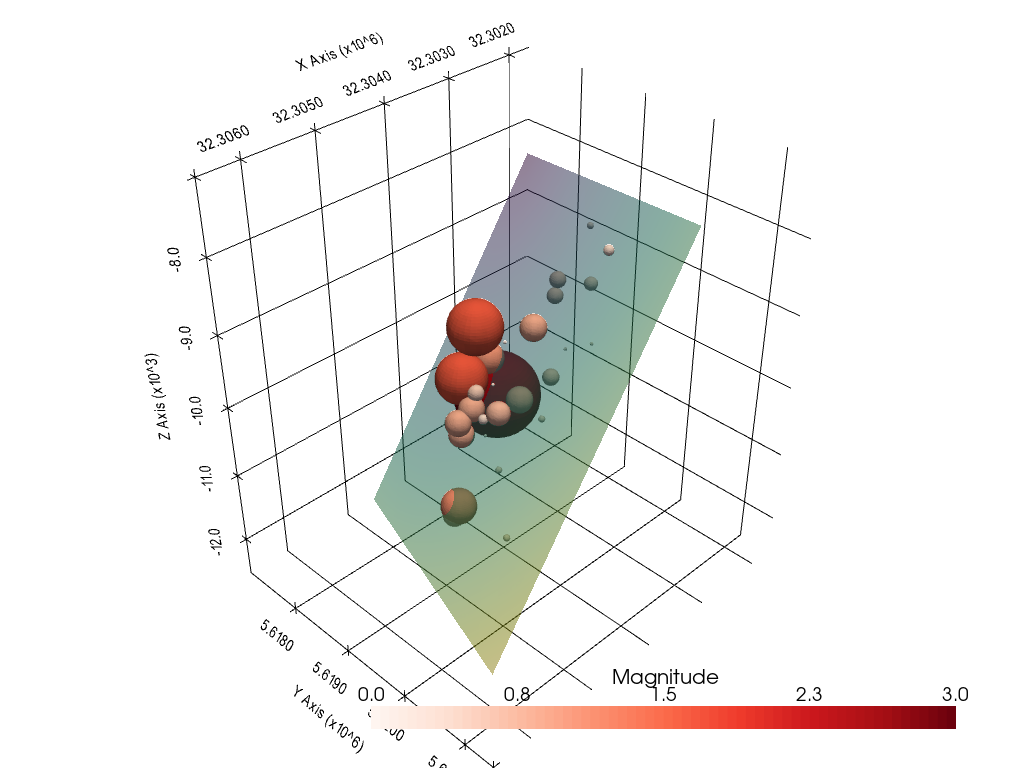

In [11]:
import pyvista as pv

sargs = dict(fmt="%.1f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(spheres,scalars='Magnitude', cmap='Reds', clim=[0,3], scalar_bar_args=sargs)
p.add_mesh(plane, opacity=0.5, show_scalar_bar=False)

p.set_background('white')
p.show_grid(color='black')
p.show()

The functionality shown above is also implemented in the function ``plane_through_hypocenters(..)``.

In [12]:
plane = gg.visualization.plane_through_hypocenters(spheres=spheres)
plane

PolyData (0x22a4f16cee0)
  N Cells:	100
  N Points:	121
  X Bounds:	3.230e+07, 3.231e+07
  Y Bounds:	5.618e+06, 5.620e+06
  Z Bounds:	-1.113e+04, -8.471e+03
  N Arrays:	2

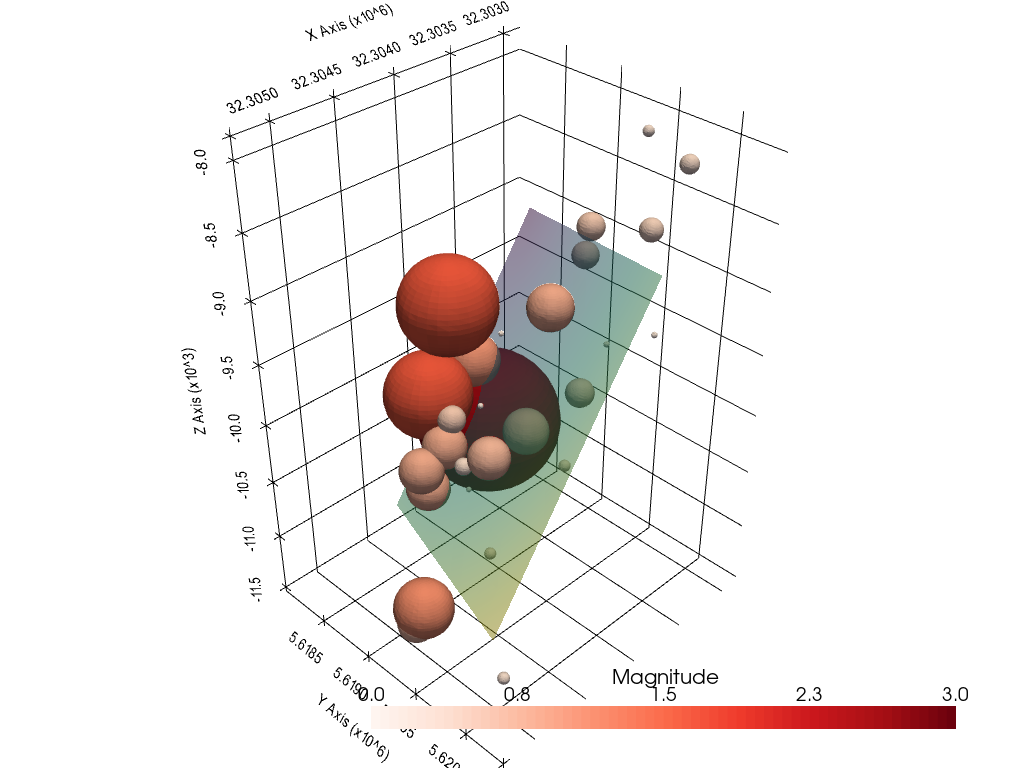

In [13]:
import pyvista as pv

sargs = dict(fmt="%.1f", color='black')

p = pv.Plotter(notebook=True)

p.add_mesh(spheres,scalars='Magnitude', cmap='Reds', clim=[0,3], scalar_bar_args=sargs)
p.add_mesh(plane, opacity=0.5, show_scalar_bar=False)

p.set_background('white')
p.show_grid(color='black')
p.show()